# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [2]:
# Load the data
tweets_df = pd.read_csv('../Data Collection/dataset.csv')

In [3]:
tweets_df = tweets_df[1:5000]
tweets_df

,tweet,bullying
1,anti greek nationalis wikipedia hi alexikoua y...,1
2,dis hoe wasnt dis violent lottery ticket,1
3,better atabay helping banned vandals pushing pov,0
4,camelcase sicko camelcase camelcase rule r bal...,0
5,hi requested arbitration wikipedia requests ar...,0
...,...,...
4995,im gonna guess bigoted non normal wrote hate p...,1
4996,suggest banning bunch ip vandals second semi p...,0
4997,okay thanks brought issue person works guinnes...,0
4998,editor david shankbone kindly stop reverting l...,0


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 1 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     4992 non-null   object
 1   bullying  4999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [5]:
tweets_df.describe()

,bullying
count,4999.000000
mean,0.191238
std,0.393316
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
tweets_df['tweet']

1       anti greek nationalis wikipedia hi alexikoua y...
2                dis hoe wasnt dis violent lottery ticket
3        better atabay helping banned vandals pushing pov
4       camelcase sicko camelcase camelcase rule r bal...
5       hi requested arbitration wikipedia requests ar...
                              ...                        
4995    im gonna guess bigoted non normal wrote hate p...
4996    suggest banning bunch ip vandals second semi p...
4997    okay thanks brought issue person works guinnes...
4998    editor david shankbone kindly stop reverting l...
4999    november utc sighs often want see turned forum...
Name: tweet, Length: 4999, dtype: object

In [7]:
tweets_df = tweets_df.dropna()

In [8]:
tweets_df

,tweet,bullying
1,anti greek nationalis wikipedia hi alexikoua y...,1
2,dis hoe wasnt dis violent lottery ticket,1
3,better atabay helping banned vandals pushing pov,0
4,camelcase sicko camelcase camelcase rule r bal...,0
5,hi requested arbitration wikipedia requests ar...,0
...,...,...
4995,im gonna guess bigoted non normal wrote hate p...,1
4996,suggest banning bunch ip vandals second semi p...,0
4997,okay thanks brought issue person works guinnes...,0
4998,editor david shankbone kindly stop reverting l...,0


# TASK #3: EXPLORE DATASET

<AxesSubplot:>

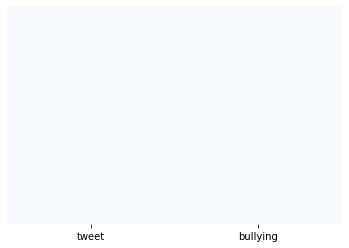

In [9]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot:title={'center':'bullying'}>]], dtype=object)

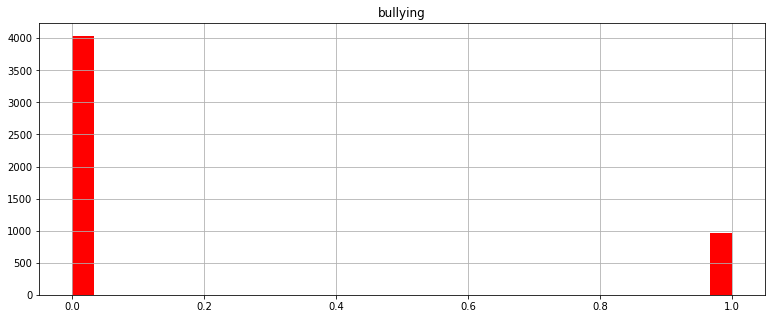

In [10]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

/home/pavan/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bullying', ylabel='count'>

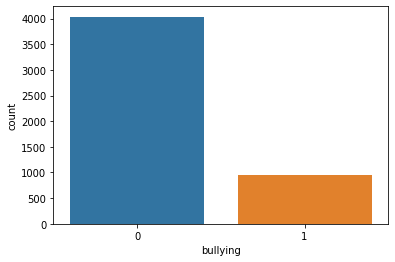

In [11]:
sns.countplot(tweets_df['bullying'], label = "Count") 

In [12]:
# Let's get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
tweets_df

,tweet,bullying,length
1,anti greek nationalis wikipedia hi alexikoua y...,1,233
2,dis hoe wasnt dis violent lottery ticket,1,40
3,better atabay helping banned vandals pushing pov,0,48
4,camelcase sicko camelcase camelcase rule r bal...,0,70
5,hi requested arbitration wikipedia requests ar...,0,231
...,...,...,...
4995,im gonna guess bigoted non normal wrote hate p...,1,84
4996,suggest banning bunch ip vandals second semi p...,0,253
4997,okay thanks brought issue person works guinnes...,0,223
4998,editor david shankbone kindly stop reverting l...,0,356


<AxesSubplot:ylabel='Frequency'>

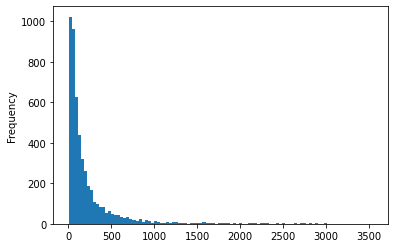

In [14]:
tweets_df['length'].plot(bins=100, kind='hist') 

In [15]:
tweets_df.describe()

,bullying,length
count,4992.000000,4992.000000
mean,0.191506,217.757011
std,0.393526,344.555463
min,0.000000,3.000000
25%,0.000000,46.000000
50%,0.000000,101.000000
75%,0.000000,235.250000
max,1.000000,3545.000000


In [16]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == min(tweets_df['length'])]['tweet'].iloc[0]

'irc'

In [17]:
tweets_df[tweets_df['length'] == tweets_df[['length']].mean(axis=1)]['tweet'].iloc[0]

'anti greek nationalis wikipedia hi alexikoua yous vandalise wikipedia editing false information may chauvinist edit false information wikipedia nowhere percent greeks albania real information census vandalise wikipedia militant ideas'

In [18]:
positive = tweets_df[tweets_df['bullying']==0]

In [19]:
positive

,tweet,bullying,length
3,better atabay helping banned vandals pushing pov,0,48
4,camelcase sicko camelcase camelcase rule r bal...,0,70
5,hi requested arbitration wikipedia requests ar...,0,231
6,nonetheless lactose hemiacetal group e g sucro...,0,73
7,revert much want never say permission attack l...,0,52
...,...,...,...
4994,emperor right see texts written wall tombs gog...,0,148
4996,suggest banning bunch ip vandals second semi p...,0,253
4997,okay thanks brought issue person works guinnes...,0,223
4998,editor david shankbone kindly stop reverting l...,0,356


In [20]:
negative = tweets_df[tweets_df['bullying']==1]

In [21]:
negative

,tweet,bullying,length
1,anti greek nationalis wikipedia hi alexikoua y...,1,233
2,dis hoe wasnt dis violent lottery ticket,1,40
8,yo bag gucci still ugly hoe shut,1,32
21,love family even need water pop red pill hoe g...,1,66
23,kitten dose look like bastard fucker,1,36
...,...,...,...
4969,believe fake mean really administrator ur mean...,1,65
4970,lol honkies talking trash done shit growup whi...,1,53
4990,little bitch straight rude,1,26
4993,sorry editing max hohar freand run bro hack li...,1,118


# TASK #4: PLOT THE WORDCLOUD

In [22]:
sentences = tweets_df['tweet'].tolist()
len(sentences)

4992

In [23]:
sentences_as_one_string =" ".join(sentences)

In [24]:
sentences_as_one_string

'anti greek nationalis wikipedia hi alexikoua yous vandalise wikipedia editing false information may chauvinist edit false information wikipedia nowhere percent greeks albania real information census vandalise wikipedia militant ideas dis hoe wasnt dis violent lottery ticket better atabay helping banned vandals pushing pov camelcase sicko camelcase camelcase rule r baley mentions inapplicable hi requested arbitration wikipedia requests arbitration trey stone davenbelle wikipedia requests arbitration trey stone davenbelle evidence mentioned evidence presented bringing attention comments evidence welcome sincerely may utc nonetheless lactose hemiacetal group e g sucrose trehalose locked acetals revert much want never say permission attack lebanon yo bag gucci still ugly hoe shut thanks would used ping thanks include sentiments appreciate time took add much appreciated talk please testing sandbox thanks jul utc scott fivelson hello believe made considerable progress adding credibility sco

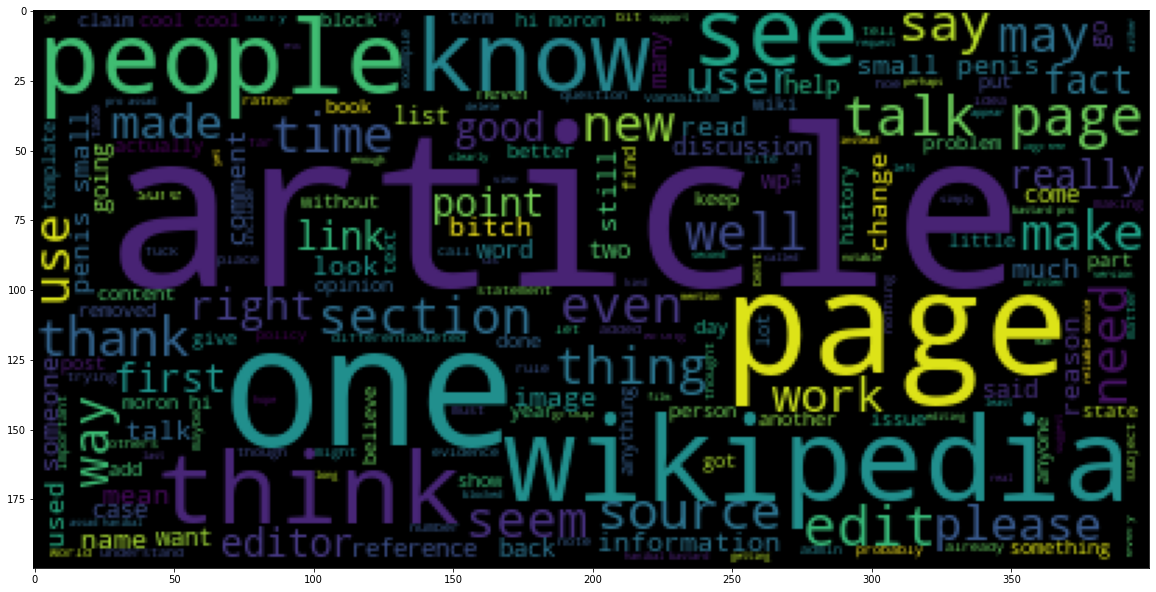

In [25]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

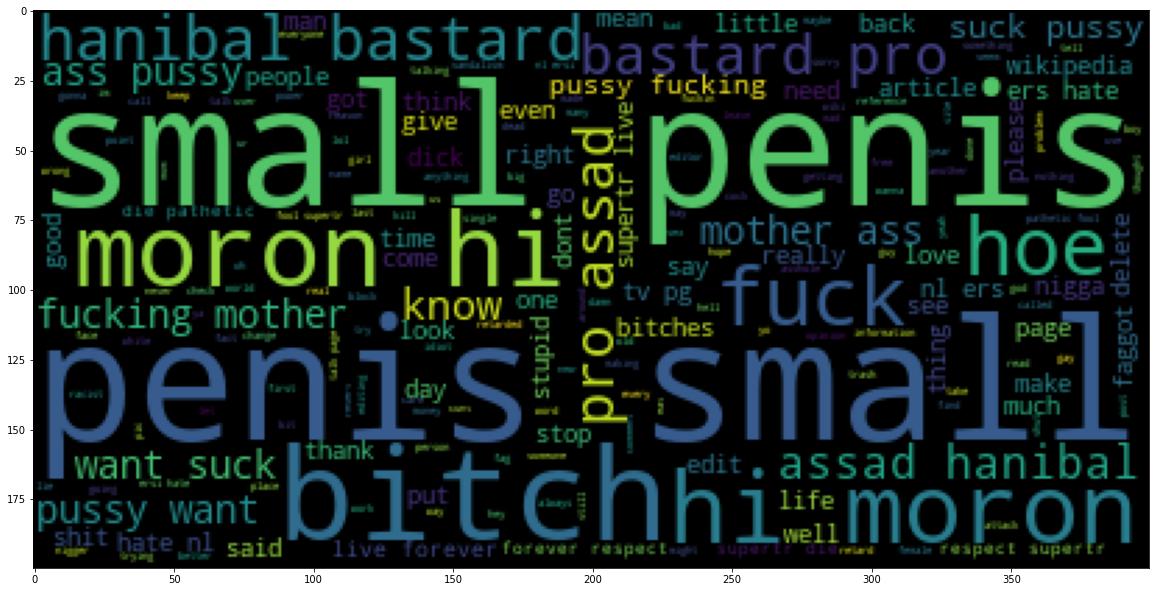

In [26]:
neg = negative['tweet'].tolist()
negsentence = " ".join(neg)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negsentence))


# TASK #5: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [29]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [30]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

# TASK 6: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [31]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

/home/pavan/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1056)>


False

In [32]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [34]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [35]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

In [36]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

# TASK 7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [37]:

from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [38]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [39]:
print(X.toarray())  

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


# TASK #8: CHANGE MADE HERE, CORRECT EVERYWHERE

In [40]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
import re
from nltk.stem import WordNetLemmatizer

def message_cleaning(message):
    message = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",message).split())
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word.lower() for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in Test_punc_removed_join_clean]
    
    return lemma_list

In [41]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [42]:
tweets_df_clean[1:10] # show the cleaned up version

2      [dis, hoe, wasnt, dis, violent, lottery, ticket]
3     [better, atabay, helping, banned, vandal, push...
4     [camelcase, sicko, camelcase, camelcase, rule,...
5     [hi, requested, arbitration, wikipedia, reques...
6     [nonetheless, lactose, hemiacetal, group, e, g...
7     [revert, much, want, never, say, permission, a...
8              [yo, bag, gucci, still, ugly, hoe, shut]
9     [thanks, would, used, ping, thanks, include, s...
10         [please, testing, sandbox, thanks, jul, utc]
Name: tweet, dtype: object

In [43]:
print(tweets_df['tweet'][5]) # show the original version

hi requested arbitration wikipedia requests arbitration trey stone davenbelle wikipedia requests arbitration trey stone davenbelle evidence mentioned evidence presented bringing attention comments evidence welcome sincerely may utc


In [94]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
func_countvectorizer = CountVectorizer(min_df=5, analyzer = message_cleaning, dtype = 'uint8')
tweets_countvectorizer = func_countvectorizer.fit_transform(tweets_df['tweet']).toarray()
#tweets_countvectorizer = vectorizer

In [95]:
#print(tweets_df.get_feature_names())


In [96]:
print(tweets_countvectorizer)  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [97]:
tweets_countvectorizer.shape

(4992, 3544)

In [98]:
tweets = pd.DataFrame(tweets_countvectorizer)
# 'zzzzzzzz'

In [99]:
# tweets = tweets_countvectorizer.toarray()

In [100]:
X = tweets_countvectorizer

In [101]:
y = tweets_df['bullying']

In [102]:
X.shape

(4992, 3544)

In [103]:
y.shape

(4992,)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets_countvectorizer, tweets_df['bullying'], test_size=0.2,random_state=10)

In [105]:
#del X

In [106]:
#del y 

In [107]:
X_train.dtype

dtype('uint8')

In [108]:
type(X_train)

numpy.ndarray

In [109]:
type(y_train)

pandas.core.series.Series

In [110]:
from sklearn import svm
import pickle
SV_Classifier = svm.SVC()
SV_Classifier.fit(X_train, y_train)
filename = 'SVMBoWTrained.sav'
with open(filename, 'wb') as fout:
    pickle.dump((SV_Classifier, func_countvectorizer), fout)

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

In [111]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

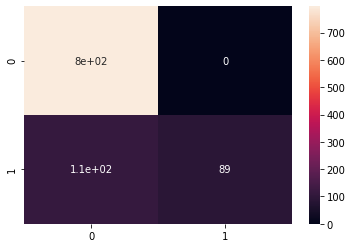

In [112]:
# Predicting the Test set results
y_predict_test = SV_Classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [113]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       796
           1       1.00      0.44      0.61       203

    accuracy                           0.89       999
   macro avg       0.94      0.72      0.77       999
weighted avg       0.90      0.89      0.87       999



# Trying out sample strings

In [114]:
input_text = ["lionel messi"]

input_vector = func_countvectorizer.transform(input_text)

print(input_vector)

In [115]:
result = SV_Classifier.predict(input_vector.toarray())
print(result)

[0]
